# Exploratory Analysis

**Introduction**


In this notebook, I will focus on analyzing stock prices of big tech companies and see how they progressed throughout the two recent presidential election (2012 - Barack Obama and 2017 - Donald Trump) all the way till now.

**Some interesting findings:**
1. Overall, stocks within the FAANG companies are closely correlated. Facebook stocks and Google stocks are the most correlated. 
2. Facebook and Google stocks were the most volatile in 2018, which was also the year when Facebook had its infamous scandal with Cambridge Analytica.
3. Facebook and Netflix stocks have the highest prices throughout both election periods.
4. Several tech stocks rocketed after Trump's elecion in 2017.

*Install packages*

In [1]:
#!pip install pandas_datareader

In [2]:
#!pip install iplot

In [3]:
#!pip install plotly #for interactive charts

In [4]:
#!pip install cufflinks

In [5]:
import pandas_datareader
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import iplot
import seaborn as sns
import plotly.graph_objects as go
import cufflinks as cf
import warnings
import os

warnings.filterwarnings('ignore')
cf.go_offline()
sns.set_style('darkgrid')
%matplotlib inline

Using pandas datareader, I will get stock information for the FAANG tech companies:
* Facebook (FB)
* Apple (AAPL)
* Amazon (AMZN)
* Netflix (NFLX)
* Google (GOOGL)

Source: Yahoo

## Part 1: Load and process data

Specify the dates and load the data from Yahoo.

In [6]:
start = datetime.datetime(2012, 5, 18) #when FB IPO
end = datetime.datetime(2020, 1, 1)

In [7]:
#Facebook
FB = data.DataReader("FB","yahoo",start,end)

#Apple
AAPL = data.DataReader("AAPL","yahoo",start,end)

#Amazon 
AMZN = data.DataReader("AMZN","yahoo",start,end)

#Netflix
NFLX = data.DataReader("NFLX","yahoo",start,end)

#Google
GOOGL = data.DataReader("GOOGL", "yahoo",start,end)

In [8]:
#Create a sorted list of tickers
tickers = ['FB','AAPL','AMZN','NFLX','GOOGL']
tickers = sorted(tickers)

#Concat data into one dataframe
stocks = pd.concat([FB,AAPL,AMZN,NFLX,GOOGL],axis=1, keys= tickers)
stocks.columns.names=['Company Tickers','Stock Info']

In [9]:
stocks.head()

Company Tickers       AAPL                                              \
Stock Info            High        Low       Open      Close     Volume   
Date                                                                     
2012-05-18       45.000000  38.000000  42.049999  38.230000  573576400   
2012-05-21       36.660000  33.000000  36.529999  34.029999  168192700   
2012-05-22       33.590000  30.940001  32.610001  31.000000  101786600   
2012-05-23       32.500000  31.360001  31.370001  32.000000   73600000   
2012-05-24       33.209999  31.770000  32.950001  33.029999   50237200   

Company Tickers                  AMZN                                   ...  \
Stock Info       Adj Close       High        Low       Open      Close  ...   
Date                                                                    ...   
2012-05-18       38.230000  77.629997  74.597145  76.279999  75.768570  ...   
2012-05-21       34.029999  80.220001  76.292854  76.357140  80.182854  ...   
2012-05-22       31.000000  81.982857  78.940002  81.364288  79.567146  ...   
2012-05-23       32.000000  81.828575  79.032860  79.642860  81.508568  ...   
2012-05-24       33.029999  82.357140  80.175713  82.267143  80.760002  ...   

Company Tickers      GOOGL                                          NFLX  \
Stock Info            Open      Close      Volume  Adj Close        High   
Date                                                                       
2012-05-18       10.328571   9.994286  29415400.0   9.994286  316.526520   
2012-05-21        9.978572  10.248571  25143300.0  10.248571  308.153168   
2012-05-22       10.257143   9.672857  40014800.0   9.672857  307.212219   
2012-05-23        9.638572  10.272857  44100000.0  10.272857  305.105103   
2012-05-24       10.217143  10.038571  20742400.0  10.038571  306.266266   

Company Tickers                                                              
Stock Info              Low        Open       Close      Volume   Adj Close  
Date                                                                         
2012-05-18       298.648651  312.862854  300.500488  11935000.0  300.500488  
2012-05-21       300.300293  300.555542  307.362366   6144600.0  307.362366  
2012-05-22       298.298309  307.027039  300.700714   6097600.0  300.700714  
2012-05-23       298.858856  301.126129  305.035034   6349800.0  305.035034  
2012-05-24       299.734741  304.884888  302.132141   3778800.0  302.132141  

[5 rows x 30 columns]

In [10]:
stocks['GOOGL']['High']

Date
2012-05-18     10.392858
2012-05-21     10.312857
2012-05-22     10.342857
2012-05-23     10.307143
2012-05-24     10.241428
                 ...    
2019-12-26    336.459991
2019-12-27    333.820007
2019-12-30    329.190002
2019-12-31    324.920013
2020-01-02    329.980011
Name: High, Length: 1918, dtype: float64

## Part 2: EDA

For this part, I use .xs() 

(Note on documentation: [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)).

**What is the max Close price for each company's stock throughout the time period?**

In [11]:
stocks.xs(key='Close',axis=1,level ='Stock Info').max()

Company Tickers
AAPL      217.500000
AMZN      300.350006
FB       2039.510010
GOOGL     418.970001
NFLX     1368.680054
dtype: float64

In [12]:
stocks.xs(key='Close',axis=1,level ='Stock Info').mean()

Company Tickers
AAPL     109.640141
AMZN     129.420476
FB       834.327117
GOOGL    145.287288
NFLX     768.227054
dtype: float64

The top two stocks are Facebook and Netflix throughout the two Presidential Election period.

Plot the stocks price throughout the entire time period.

In [13]:
#Compare stock prices among the big tech companies
stocks.xs(key='Close',axis=1,level='Stock Info').iplot()


Interactive candle-stick plot. This plot shows the Open/High/Low/Close prices of a stock per day. 

In [14]:
for tick in tickers:
    stocks[tick].iplot(kind='candle')
    
    print('Stock prices of '+tick+' from May 2012 to present')

Stock prices of AAPL from May 2012 to present


Stock prices of AMZN from May 2012 to present


Stock prices of FB from May 2012 to present


Stock prices of GOOGL from May 2012 to present


Stock prices of NFLX from May 2012 to present


In [15]:
#Focus on the details of one stock, say Google
#fig = stocks['GOOGL'].iplot(kind='candle')
fig = go.Figure(data=[go.Candlestick(x=stocks.index, open = stocks['GOOGL']['Open'],
                                     high =stocks['GOOGL']['High'], low = stocks['GOOGL']['Low'],
                                      close = stocks['GOOGL']['Close'])])

fig.update_layout(
    title='Google stock prices from May 2012 to Jan 2020',
    yaxis_title='Google Stock',
    shapes = [dict(
        x0='2016-11-06', x1='2016-11-06', y0=0, y1=1, xref='x', yref='paper',
        line_width=1),
             dict(
        x0='2012-11-06', x1='2012-11-06', y0=0, y1=1, xref='x', yref='paper',
        line_width=1)],
    annotations=[dict(
        x='2016-11-06', y=1, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Trump Election'),
               dict(
        x='2012-11-06', y=1, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Obama Election') ]
)

fig.show()

This chart shows that Google's stocks shot up after the election in 2016.

### Moving average

In [16]:
def movingaverage(data, window):
    moving_avg = data.rolling(window=window).mean()
    #moving_avg_large = stocks[tick]['Close'].rolling(window=window_large).mean()
    return moving_avg #, moving_avg_large

In [17]:
def plot_movingavg(tick, window_small, window_large): 
    fig1 = go.Candlestick(x=stocks.index, open = stocks[tick]['Open'],
                                     high =stocks[tick]['High'], low = stocks[tick]['Low'],
                                      close = stocks[tick]['Close'],
                     name = 'Stock price')

    fig2 = go.Scatter(x=list(stocks.index), y=movingaverage(stocks[tick]['Close'], window_small), marker=dict(color='#E377C2'),
                 name ='SMA = '+str(window_small))

    fig3 = go.Scatter(x=list(stocks.index), y=movingaverage(stocks[tick]['Close'], window_large), marker=dict(color='gray'),
                 name ='SMA = '+str(window_large))

    data =[fig1,fig2,fig3]

    fig = go.Figure(data=data)
    fig.update_layout(
    title= tick+ ' stock prices from May 2012 to Jan 2020',
    yaxis_title= tick+' Stock',
    shapes = [dict(
        x0='2016-11-06', x1='2016-11-06', y0=0, y1=1, xref='x', yref='paper',
        line_width=1),
             dict(
        x0='2012-11-06', x1='2012-11-06', y0=0, y1=1, xref='x', yref='paper',
        line_width=1)],
    annotations=[dict(
        x='2016-11-06', y=1, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Trump Election'),
               dict(
        x='2012-11-06', y=1, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Obama Election') ]
)

    fig.show()

Compare the moving average and the actual price of Facebook and Google stocks.

In [18]:
plot_movingavg('FB', 20, 100)

In [19]:
plot_movingavg('GOOGL', 20, 100)

The two stocks seemed to follow the same trend - they started rocketing after Trump's election. They also seemed more volatile then.

The chart below plotted them together to compare the magnitude.

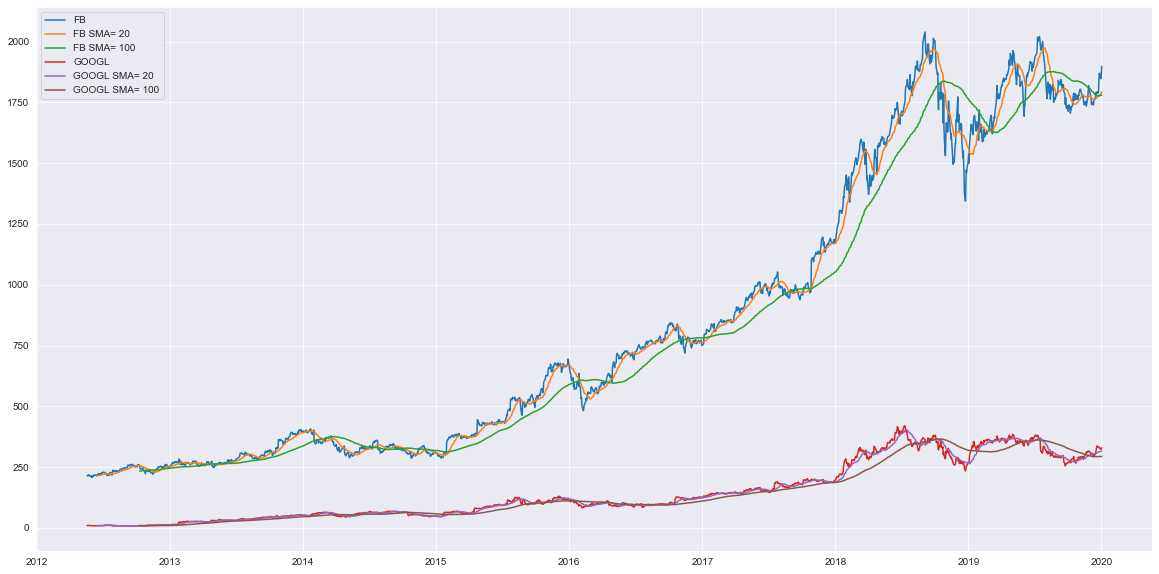

In [20]:
plt.figure(figsize=(20,10))
for tick in ['FB','GOOGL']:
    moving_avg_20 = stocks[tick]['Close'].rolling(window=20).mean() #a month
    moving_avg_100 = stocks[tick]['Close'].rolling(window=100).mean() #3 months
    plt.plot(stocks[tick]['Close'],label=tick)
    plt.plot(moving_avg_20, label = tick+' SMA= 20')
    plt.plot(moving_avg_100, label = tick+' SMA= 100')
    plt.legend(loc='best')

Using moving average, we can detect signals when to buy or sell a stock. When the shorter-term MA crosses above the longer-term MA, it's a buy signal, as it indicates that the trend is shifting up. This is known as a "golden cross." For example, FB stocks were good to buy in early 2015, mid 2016, early 2017 and end of 2017, etc.

Meanwhile, when the shorter-term MA crosses below the longer-term MA, it's a sell signal, as it indicates that the trend is shifting down. This is known as a "dead/death cross." For example, FB stocks were good to sell in late 2018.

Google stocks seemed pretty stable in this graph, which could be because of its relative comparison to stock prices of FB.

### Heatmap showing correlation

Let's actually check the correlations between these stocks and visualize them using heatmap.

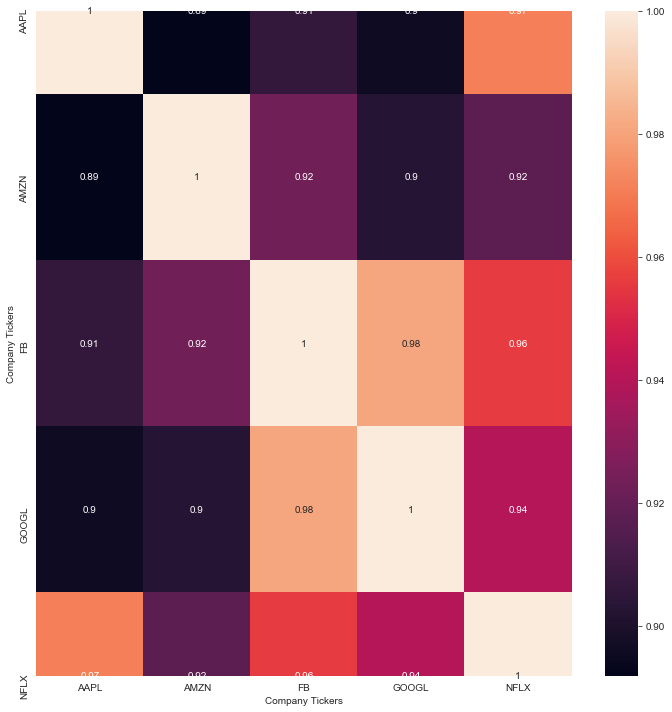

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(stocks.xs(key='Close',axis =1, level ='Stock Info').corr(),annot= True)
plt.tight_layout()

<Figure size 720x720 with 0 Axes>

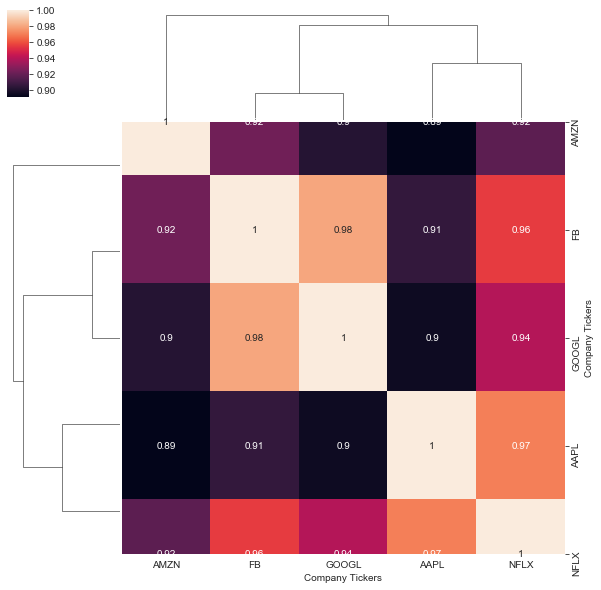

In [22]:
plt.figure(figsize=(10,10))
sns.clustermap(stocks.xs(key='Close',axis =1, level ='Stock Info').corr(),annot= True)

Interesting, they are all highly correlated. It could be because they are all representatives of the tech industry and their stock prices vary due to changes in the industry. Of all the stocks, Facebook and Google are the most correlated, which confirmed our observation above.

### Analyze returns

Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [23]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' return'] = (stocks[tick]['Close'] - stocks[tick]['Close'].shift())/stocks[tick]['Close'].shift()
returns.head()

AAPL return  AMZN return  FB return  GOOGL return  NFLX return
Date                                                                      
2012-05-18          NaN          NaN        NaN           NaN          NaN
2012-05-21    -0.109861     0.058260   0.019920      0.025443     0.022835
2012-05-22    -0.089039    -0.007679  -0.012746     -0.056175    -0.021674
2012-05-23     0.032258     0.024400   0.009056      0.062029     0.014414
2012-05-24     0.032187    -0.009184  -0.009389     -0.022806    -0.009517

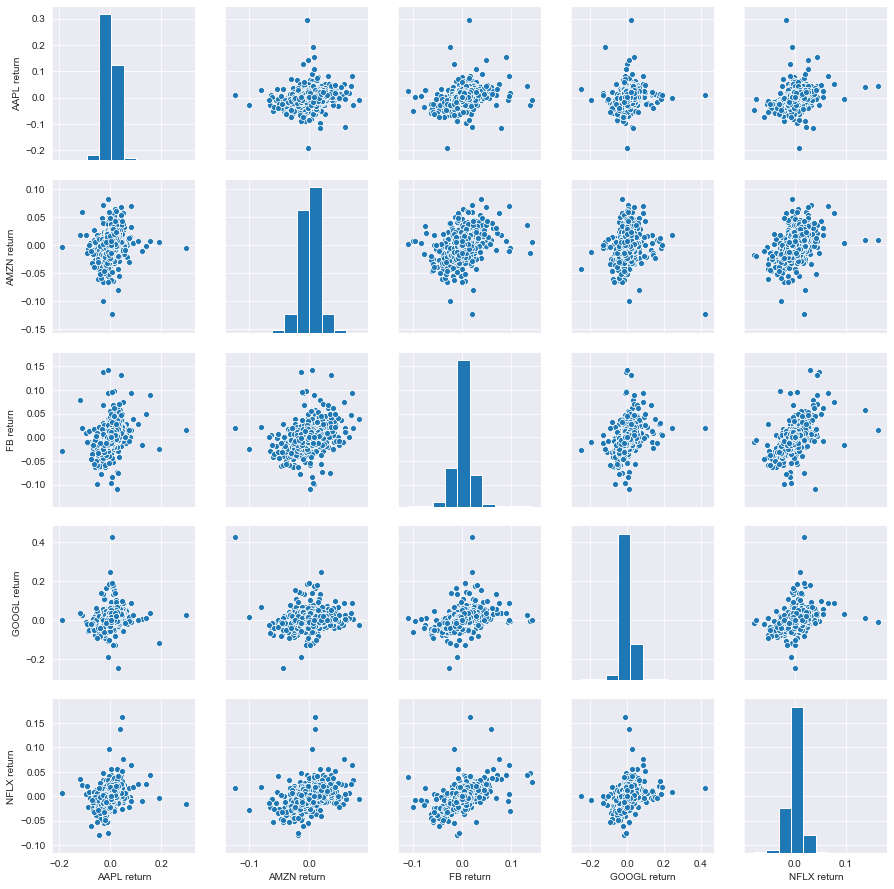

In [24]:
sns.pairplot(returns[1:])

Overall, all of the stocks' returns cluster around 0. Based on the pair plot, Facebook return and Netflix return seems to correlate. We can examine this further

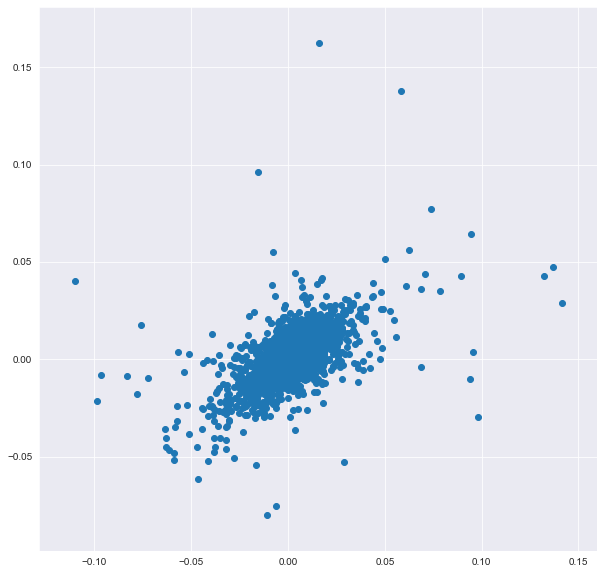

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(returns['FB return'], returns['NFLX return'])


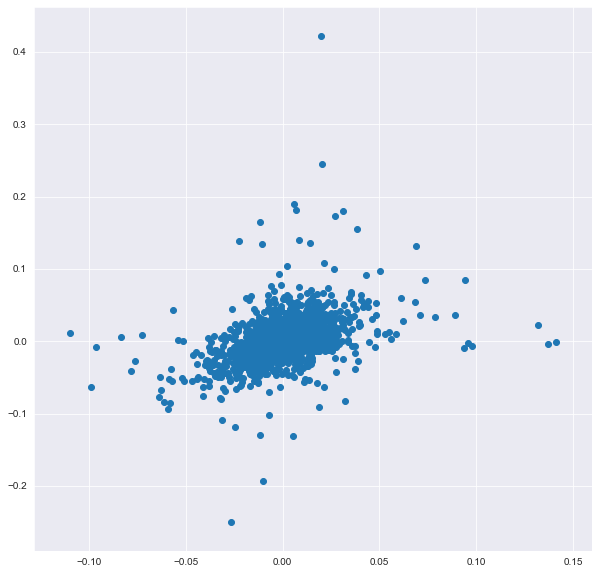

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(returns['FB return'], returns['GOOGL return'])


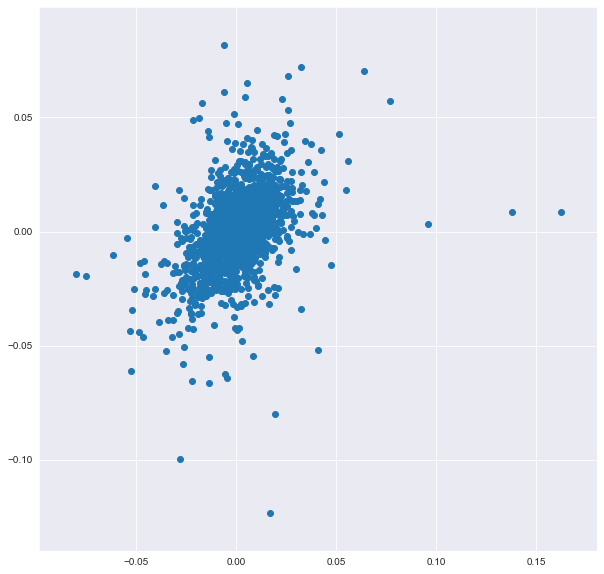

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(returns['NFLX return'], returns['AMZN return'])

Next let's see which stocks increased/dropped the most/least and when.

In [28]:
returns.max(), returns.min()

(AAPL return     0.296115
 AMZN return     0.081982
 FB return       0.141311
 GOOGL return    0.422235
 NFLX return     0.162584
 dtype: float64, AAPL return    -0.189609
 AMZN return    -0.123558
 FB return      -0.109972
 GOOGL return   -0.250155
 NFLX return    -0.080067
 dtype: float64)

In [29]:
returns.idxmax()

AAPL return    2013-07-25
AMZN return    2014-04-24
FB return      2015-04-24
GOOGL return   2013-01-24
NFLX return    2015-07-17
dtype: datetime64[ns]

In [30]:
returns.idxmin()

AAPL return    2018-07-26
AMZN return    2013-01-24
FB return      2014-01-31
GOOGL return   2012-07-25
NFLX return    2012-10-18
dtype: datetime64[ns]

It seems that both Google and Netflix stocks dropped the most around the Obama's presidential election (he was re-elected on Nov 6 2012). Amazon stock also dropped after the election. Apple stocks dropped in July 2018, quite a while after Trump's election so there is no visible connection between these two events.

Google stock peaked after Obama's election. Other stocks also hit the highest percentage change during Obama's president term (between 2012 and 2016). However such change can be partially explained by their initial drops right after the election.

**Volatility**

Let's check to see which stocks are most volatile/stable.

In [31]:
returns.std()

AAPL return     0.022786
AMZN return     0.015953
FB return       0.018373
GOOGL return    0.030244
NFLX return     0.014520
dtype: float64

Google and Apple stocks are most volatile. Netflix's is the most stable.

Next, I want to check their volatility during the two election periods.

In [32]:
#Trump

returns.ix['2015-06-16':'2016-11-06'].std() #start date is the startdate of his election campaign

AAPL return     0.018356
AMZN return     0.016486
FB return       0.019567
GOOGL return    0.031357
NFLX return     0.016735
dtype: float64

In [33]:
#Obama
returns.ix[start:'2012-11-06'].std()

AAPL return     0.041772
AMZN return     0.015637
FB return       0.017093
GOOGL return    0.046013
NFLX return     0.014116
dtype: float64

Google was the most volatile stocks during both election period. During Obama's reelection in 2012, Apple stock was volatile too.

Create a histogram for these two stocks during this periods.

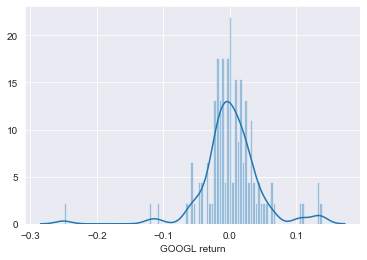

In [34]:
sns.distplot(returns.ix['2012-05-19':'2012-11-06']['GOOGL return'], bins=100)

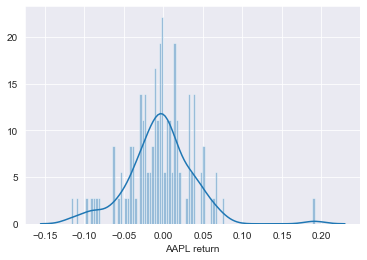

In [35]:
sns.distplot(returns.ix['2012-05-19':'2012-11-06']['AAPL return'], bins=100)

**Bollinger Band Plot**

Another way to examine the volatility of stocks at a time period, we add a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price to see the trends/ volatility. The stocks are more volatile the bands widen; during less volatile periods, the bands contract.

In [36]:
print('Facebook stocks form June 2015 to present') #when Trump started his campaign
FB['Close'].ix['2015-06-16':end].ta_plot(study='boll')

Facebook stocks form June 2015 to present


In [37]:
print('Google stocks form June 2015 to present') #when Trump started his campaign
GOOGL['Close'].ix['2015-06-16':end].ta_plot(study='boll')

Google stocks form June 2015 to present


Both stocks seemed to be the most volatile in 2018. It was the time of FB's infamous scandal with Cambridge Analytica when it was accused of leaking its users' private data. As shown above, Google and Facebook stocks tend to correlate, perhaps this scandal negatively affected Google too.

# Conclusion

Some interesting findings:
1. Overall, stocks within the FAANG companies are closely correlated. Facebook stocks and Google stocks are the most correlated. 
2. Facebook and Google stocks were the most volatile in 2018, which was also the year when Facebook had its infamous scandal with Cambridge Analytica.
3. Facebook and Netflix stocks have the highest prices throughout both election periods.
4. Several tech stocks rocketed after Trump's elecion in 2017.